# Code of the K=4 armed bandit TestBed
### @Author: Daniel Vallejo Aldana

In [43]:
import numpy as np
import random
from scipy.stats import bernoulli as bl
import matplotlib.pyplot as plt

In [38]:
q_values=[0.28199934, 0.34942246, 0.31960328, 0.56775668]
aval={}
for i,v in enumerate(q_values):
    aval[i+1]=v

In [39]:
def reward(action,daction):
    return np.random.normal(loc=daction[action],scale=1)

def return_action(Q,N):
    ind=Q.tolist().index(max(Q))
    N[ind]+=1
    return ind+1

In [45]:
def epsilon_greedy(epsilon=0,qvals=q_values,daction=aval,time_steps=300,seed=10):
    #epsilon value is set to 0 by default, just taking greedy actions
    np.random.seed(seed)
    random.seed(seed)
    Q=np.zeros_like(np.asarray(qvals))
    N=np.zeros_like(np.asarray(qvals))
    rewards=[]
    for step in range(time_steps):
        #epsilon greedy update
        option=bl.rvs(1-epsilon)
        if option:
            #Geedy action
            action=return_action(Q,N)
            R=reward(action,daction)
            rewards.append(R)
            Q[action-1]=Q[action-1]+(1/N[action-1])*(R-Q[action-1]) #Update equation
        else:
            #Select action randomly
            action=random.randrange(1,len(qvals))
            R=reward(action,daction)
            N[action-1]+=1
            rewards.append(R)
            Q[action-1]=Q[action-1]+(1/N[action-1])*(R-Q[action-1]) #Update equation
    return Q,rewards

In [54]:
average_dist=np.zeros(300)
colores=['red','blue','green','magenta']
samples=10000
for i in range(samples):
    Qv,Re=epsilon_greedy(seed=i+1)
    #plt.plot(Re,color=colores[i%len(colores)])
    average_dist=average_dist+np.asarray(Re)
average_dist=average_dist/samples

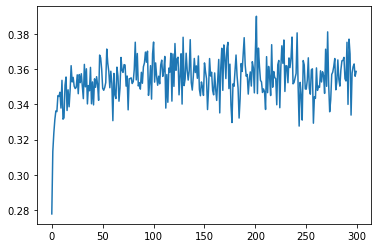

In [55]:
plt.plot(average_dist)